In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
with open("docs/MA_energy_codes_town.json", "r") as f:
    outdata = json.load(f)

In [3]:
all_dates_used = list(set([f['properties']['start'] for f in outdata['features']]) | set([f['properties']['end'] for f in outdata['features']]))
all_dates_used.sort()

In [4]:
codes = np.zeros((len(all_dates_used), 3), dtype=int)

In [5]:
for dat in outdata['features']:
    entry = dat['properties']
    start = all_dates_used.index(entry['start'])
    end = all_dates_used.index(entry['end'])
    codes[start:end + 1, entry['code_color'] % 10] += entry['pop2010']   

(14245.0, 20635.0)

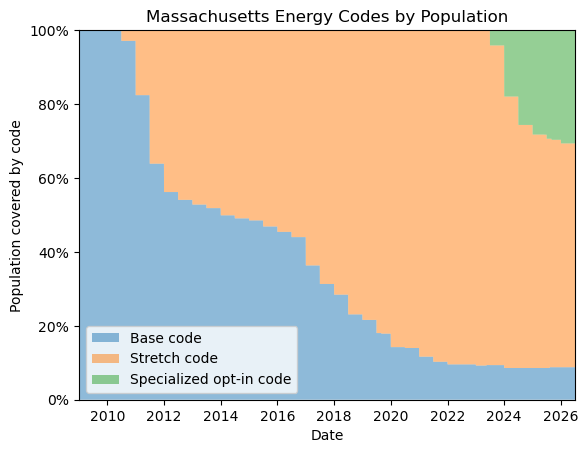

In [ ]:
from matplotlib import ticker

fig, ax = plt.subplots()
ax.stackplot(Time(all_dates_used).datetime, codes.T,
              labels=['Base code', 'Stretch code', 'Specialized opt-in code'], alpha=0.5)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=codes[0, 0]))
ax.yaxis.set_major_locator(ticker.MultipleLocator(codes[0, 0]* 0.2))
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Population covered by code')
ax.set_title('Massachusetts Energy Codes by Population')
ax.set_ylim(0, codes[0, 0])
ax.set_xlim(Time(all_dates_used[0]).datetime, Time(all_dates_used[-1]).datetime)

(0.0, 6875010.45)

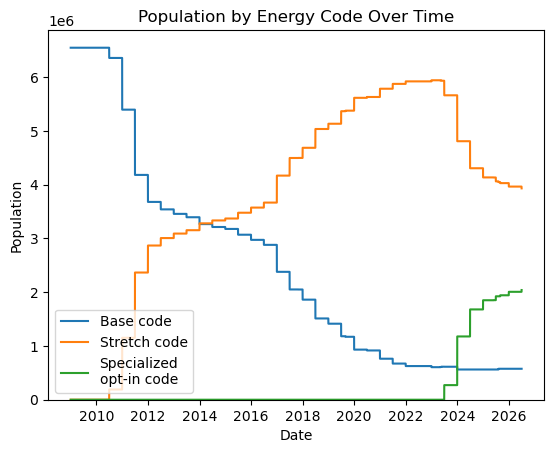

In [50]:
plt.plot(Time(all_dates_used).datetime, codes[:, 0], label='Base code')
plt.plot(Time(all_dates_used).datetime, codes[:, 1], label='Stretch code')
plt.plot(Time(all_dates_used).datetime, codes[:, 2], label='Specialized\nopt-in code')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Population by Energy Code Over Time')
plt.ylim(0, None)

In [13]:
end_year_dates = ['2009-01-01T00:00:00'] + \
[f'{year}-12-31T00:00:00' for year in range(2010, 2025)] + \
['2026-07-01T00:00:00']

In [22]:
codes_at_year_end = codes[[all_dates_used.index(date) for date in end_year_dates], :]

(2008.5, 2025.5)

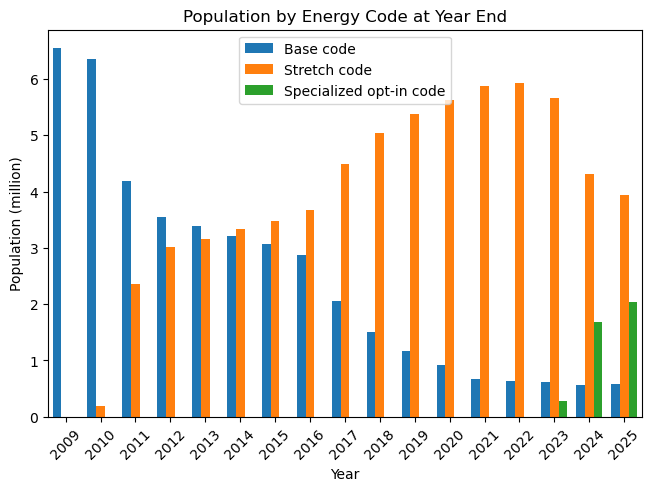

In [37]:
x = np.arange(2009, 2026)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(layout='constrained')
ax.bar(x - width, codes_at_year_end[:, 0] / 1e6, width, label='Base code', color='C0')
ax.bar(x, codes_at_year_end[:, 1] / 1e6, width, label='Stretch code', color='C1')
ax.bar(x + width, codes_at_year_end[:, 2] / 1e6, width, label='Specialized opt-in code', color='C2')
ax.set_xlabel('Year')
ax.set_ylabel('Population (million)')
ax.set_title('Population by Energy Code at Year End')
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.tick_params("x", rotation=45)
ax.set_xlim(2008.5, 2025.5)

(2008.5, 2025.5)

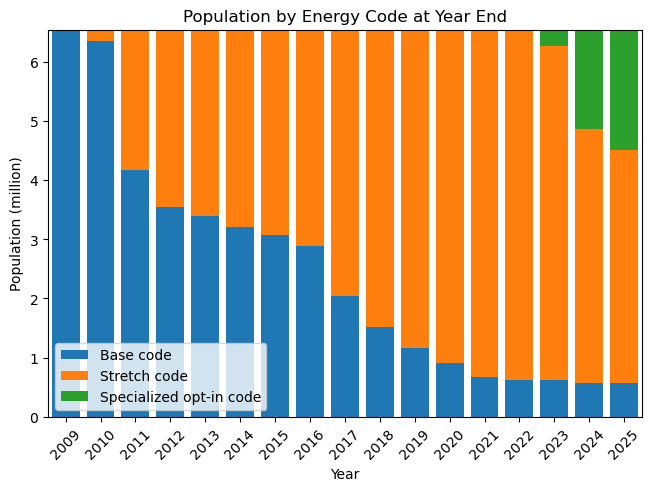

In [41]:
fig, ax = plt.subplots(layout='constrained')
width=0.8
ax.bar(x, codes_at_year_end[:, 0] / 1e6, width, 
       bottom=0, label='Base code', color='C0')
ax.bar(x, codes_at_year_end[:, 1] / 1e6, width,
       bottom=codes_at_year_end[:,0] / 1e6, label='Stretch code', color='C1')
ax.bar(x, codes_at_year_end[:, 2] / 1e6, width, 
       bottom=codes_at_year_end[:, :2].sum(axis=1) / 1e6,
       label='Specialized opt-in code', color='C2')
ax.set_xlabel('Year')
ax.set_ylabel('Population (million)')
ax.set_title('Population by Energy Code at Year End')
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.tick_params("x", rotation=45)
ax.set_xlim(2008.5, 2025.5)